<h3><center>iNeuron End to End Machine Learning Project Live</center></h3>
<h4><center>Student Performance Indicator</center></h4>

#### Problem Statement:
 - This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

##### Dataset Source:
 - Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
 - The data consists of 8 column and 1000 rows.

In [23]:
# import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
# read the dataset
df = pd.read_csv('data/StudentsPerformance.csv')

# check the dimensions of the data
df.shape

(1000, 8)

In [25]:
# show first 5 records
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<h4>Dataset Information:</h4>

 - gender : sex of students -> (Male/female)
 - race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
 - parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
 - lunch : having lunch before test (standard or free/reduced)
 - test preparation course : complete or not complete before test
 - math score
 - reading score
 - writing score

In [26]:
# check datatypes present
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [27]:
# descriptive statistics
df.describe().round(2)

,math score,reading score,writing score
count,1000.00,1000.00,1000.00
mean,66.09,69.17,68.05
std,15.16,14.60,15.20
min,0.00,17.00,10.00
25%,57.00,59.00,57.75
50%,66.00,70.00,69.00
75%,77.00,79.00,79.00
max,100.00,100.00,100.00


 - From above description of numerical data, all means are very close to each other - between 66 and 68.05;
 - All standard deviations are also close - between 14.6 and 15.19;
 - While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

In [28]:
# concise information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [29]:
# unique values
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [30]:
# missing/null values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [31]:
# duplicate records
df.duplicated().sum()

0

In [32]:
# categories present in categorical columns
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
categorical_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [33]:
for i in categorical_features:
    print("categories present in", i, ":\n", df[i].unique())

categories present in gender :
 ['female' 'male']
categories present in race/ethnicity :
 ['group B' 'group C' 'group A' 'group D' 'group E']
categories present in parental level of education :
 ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories present in lunch :
 ['standard' 'free/reduced']
categories present in test preparation course :
 ['none' 'completed']


In [34]:
# let's add columns like total_score and average_score
df["total_score"] = df["math score"] + df["reading score"] + df["writing score"]
df["average_score"] = round(df["total_score"]/3,2)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [35]:
# no of students who scored full marks in the subjects
def full_marks(data):
    math_full = data[data["math score"]==100]["average_score"].count()
    reading_full = data[data["reading score"]==100]["average_score"].count()
    writing_full = data[data["writing score"]==100]["average_score"].count()

    print("Number of Students who scored full marks in maths:", math_full)
    print("Number of Students who scored full marks in reading:", reading_full)
    print("Number of Students who scored full marks in writing:", writing_full)

In [37]:
# no of students who scored full marks in the subjects
full_marks(df)

Number of Students who scored full marks in maths: 7
Number of Students who scored full marks in reading: 17
Number of Students who scored full marks in writing: 14


In [38]:
# no of students failed in the subjects
def fail_marks(data):
    math_fail = data[data["math score"]<30]["average_score"].count()
    reading_fail = data[data["reading score"]<30]["average_score"].count()
    writing_fail = data[data["writing score"]<30]["average_score"].count()

    print("Number of Students who failed in maths:", math_fail)
    print("Number of Students who failed in reading:", reading_fail)
    print("Number of Students who failed in writing:", writing_fail)

In [39]:
# no of students failed in the subjects
fail_marks(df)

Number of Students who failed in maths: 14
Number of Students who failed in reading: 8
Number of Students who failed in writing: 9


In [40]:
# no of students who scored zero in the subjects
def zero_marks(data):
    math_zero = data[data["math score"]==0]["average_score"].count()
    reading_zero = data[data["reading score"]==0]["average_score"].count()
    writing_zero = data[data["writing score"]==0]["average_score"].count()

    print("Number of Students who scored zero marks in maths:", math_zero)
    print("Number of Students who scored zero marks in reading:", reading_zero)
    print("Number of Students who scored zero marks in writing:", writing_zero)

In [41]:
# no of students who scored zero in the subjects
zero_marks(df)

Number of Students who scored zero marks in maths: 1
Number of Students who scored zero marks in reading: 0
Number of Students who scored zero marks in writing: 0


<h4>Insights:</h4>
 
 - Students performance is worst in mathematics as per the data analysis above.
 - Students performance is good in reading and writing.
 - There is only 1 student who scored 0 marks in mathematics and in rest other subjects there are no students with 0 marks.

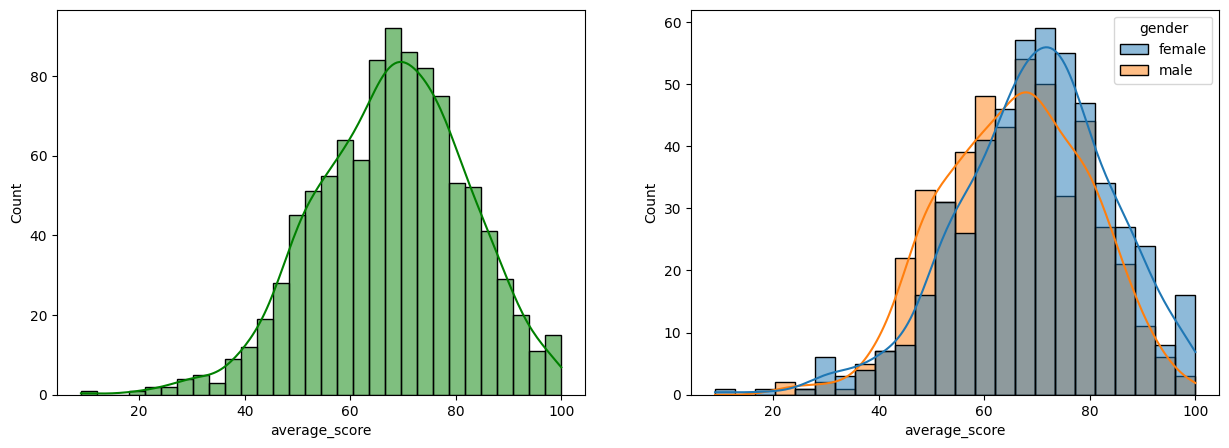

In [43]:
# average_score
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()

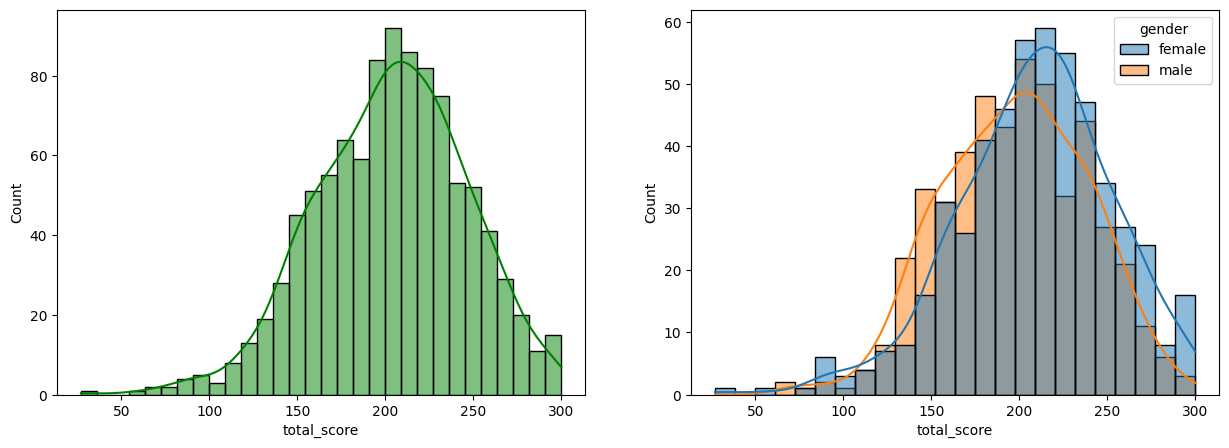

In [46]:
# total_score
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

#### Female students have performed well than male students.

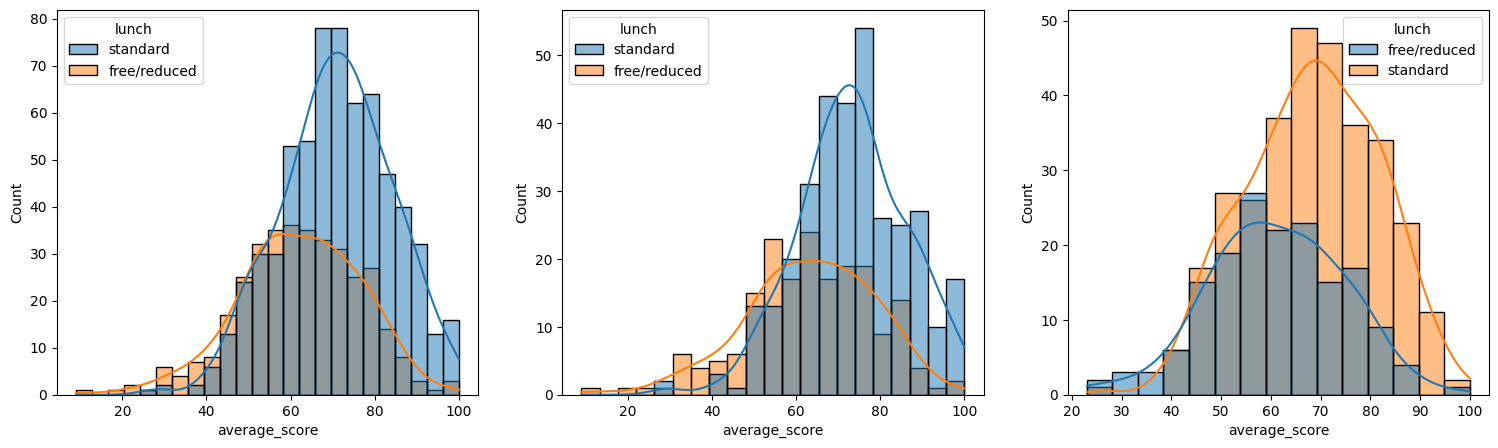

In [47]:
# average_score and lunch
plt.subplots(1,3,figsize=(25,5))
plt.subplot(141)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch')
plt.show()

#### Standard lunch is helping students perform well in exam irrespective of the gender.

In [50]:
# average_score and parental level of education
df.groupby(['parental level of education','gender'])['average_score'].mean().reset_index()

,parental level of education,gender,average_score
0,associate's degree,female,71.123621
1,associate's degree,male,67.867642
2,bachelor's degree,female,74.672063
3,bachelor's degree,male,68.776182
4,high school,female,64.748404
5,high school,male,61.575490
6,master's degree,female,73.648056
7,master's degree,male,73.521304
8,some college,female,71.002542
9,some college,male,65.715741


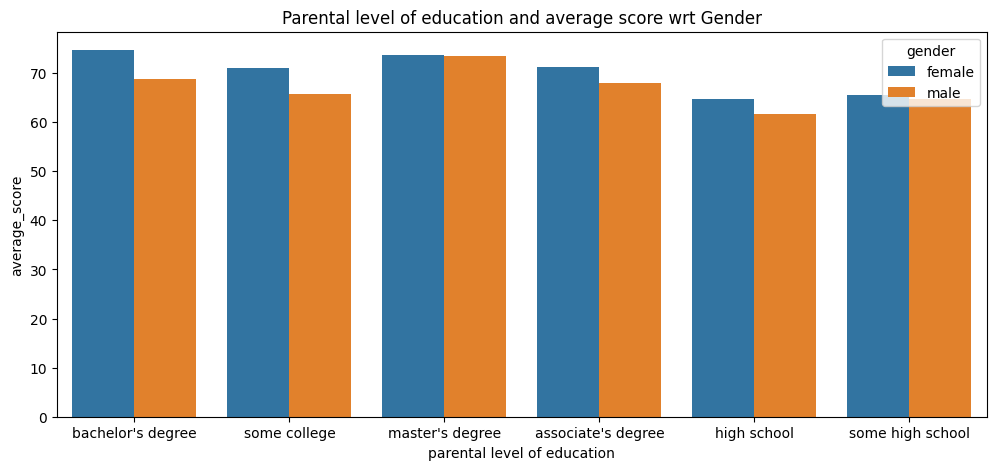

In [53]:
# average_score and parental level of education
plt.figure(figsize=(12,5))
sns.barplot(x='parental level of education', y='average_score', data=df, hue='gender', estimator=np.mean, ci=None)
plt.title("Parental level of education and average score wrt Gender")
plt.show()

#### In general there is no significant role of parental level of education on the students performance according to the data provided. However, if we take a closer look we observed that students whose parental level of education is master's degree or associate's degree performed well in the exams.

In [55]:
# average_score and race/ethnicity
df.groupby(['race/ethnicity','gender'])['average_score'].mean().reset_index()

,race/ethnicity,gender,average_score
0,group A,female,65.129167
1,group A,male,61.540566
2,group B,female,67.510000
3,group B,male,62.999884
4,group C,female,68.585222
5,group C,male,65.249137
6,group D,female,71.439302
7,group D,male,66.987444
8,group E,female,74.062319
9,group E,male,71.478592


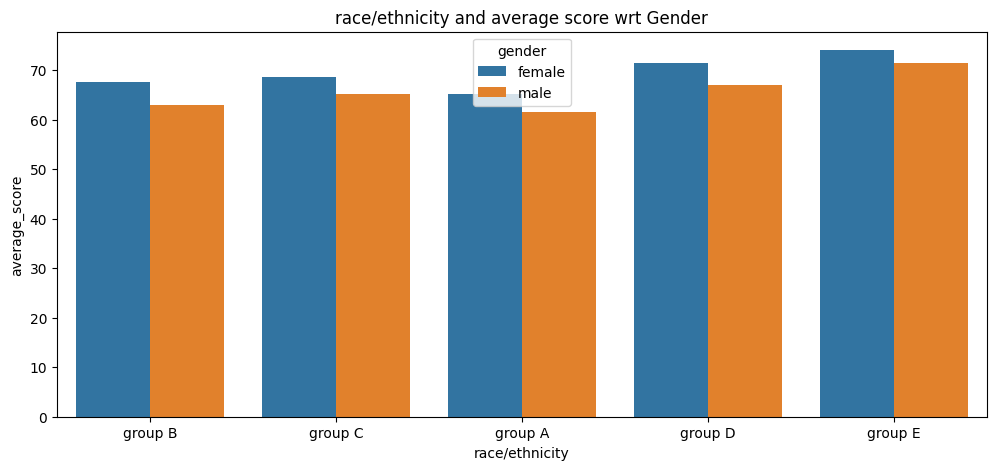

In [56]:
# average_score and race/ethnicity
plt.figure(figsize=(12,5))
sns.barplot(x='race/ethnicity', y='average_score', data=df, hue='gender', estimator=np.mean, ci=None)
plt.title("race/ethnicity and average score wrt Gender")
plt.show()

In [ ]:
# average_score and test preparation course
